In [1]:
#seaborn
#Seaborn merupakan API yang berdasar dari Matplotlib, memiliki high-level function untuk tipe plot yang umum digunakan untuk statistik, Seaborn juga dapat diintegrasikan dengan DataFrames dari Pandas.

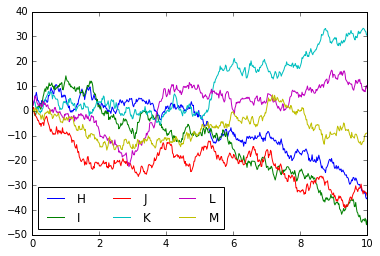

In [3]:
#seaborn vs matplotlib
#contoh sederhana matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

#buat beberapa data
sat=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(sat.randn(500,6),0)
#plot data menggunakan setting default matplotlib
plt.plot(x,y)
plt.legend('HIJKLM',ncol=3,loc='lower left');

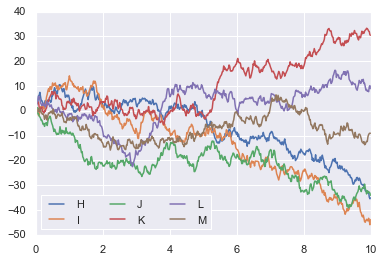

In [5]:
import seaborn as sns
sns.set()
#menggunakan data yang sama dengan diatas
plt.plot(x,y)
plt.legend('HIJKLM',ncol=3,loc='lower left');

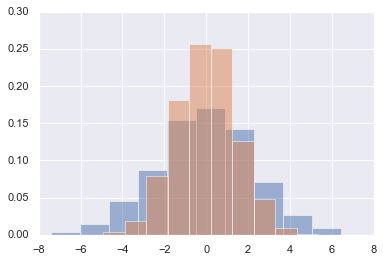

In [10]:
#exploring seaborn plot
#histogram, kde, dan density
#histogram
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], bins=10, density=True, alpha=0.5)

In [11]:
# juga dapat menghasilkan estimasi yang tidak kasar dari distribusi tersebut menggunakan kernel density estimation (KDE) yang dapat dihasilkan menggunakan Seaborn dengan sns.kdeplot:

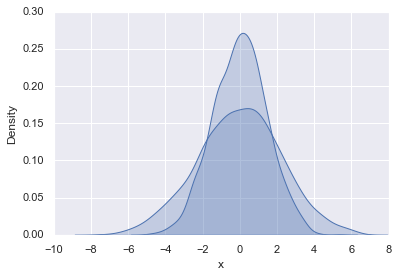

In [16]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

In [17]:
#Histogram dan KDE dapat digabungkan menggunakan distplot:

C:\Users\kl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


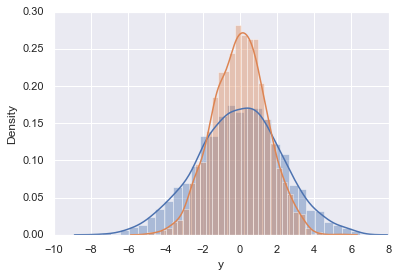

In [19]:
sns.distplot(data['x'])
sns.distplot(data['y']);

C:\Users\kl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


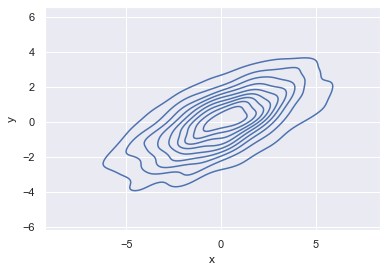

In [21]:
sns.kdeplot(data['x'], data['y']);

In [22]:
#Kita dapat melihat joint distribution dan marginal distribution secara bersamaan menggunakan sns.jointplot. Untuk plot ini, kita gunakan style white background:

C:\Users\kl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


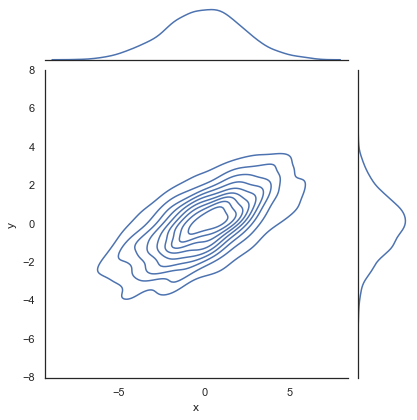

In [23]:
with sns.axes_style('white'):
    sns.jointplot(data['x'], data['y'], kind='kde')

In [24]:
#Ada beberapa parameter lain yang dapat kita ganti pada jointplot, contohnya adalah kita dapat menggunkaan histogram dengan base hexagonal:

C:\Users\kl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


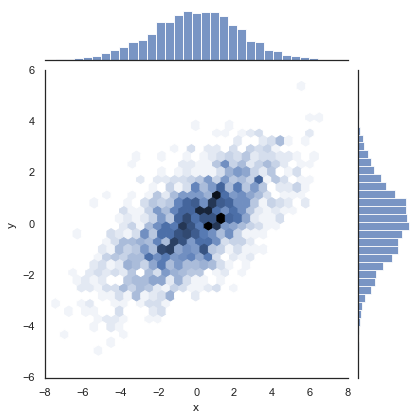

In [25]:
with sns.axes_style('white'):
    sns.jointplot(data['x'],data['y'], kind='hex');

In [26]:
#pairplot
#Ketika kita membuat joint plot menggunakan dataset dengan dimensi yang lebih besar, maka akan menghasilkan pair plots, yang sangat berguna untuk mengeksplorasi hubungan antar data multidimensi, juga melihat pair plots secara berpasangan.

In [27]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


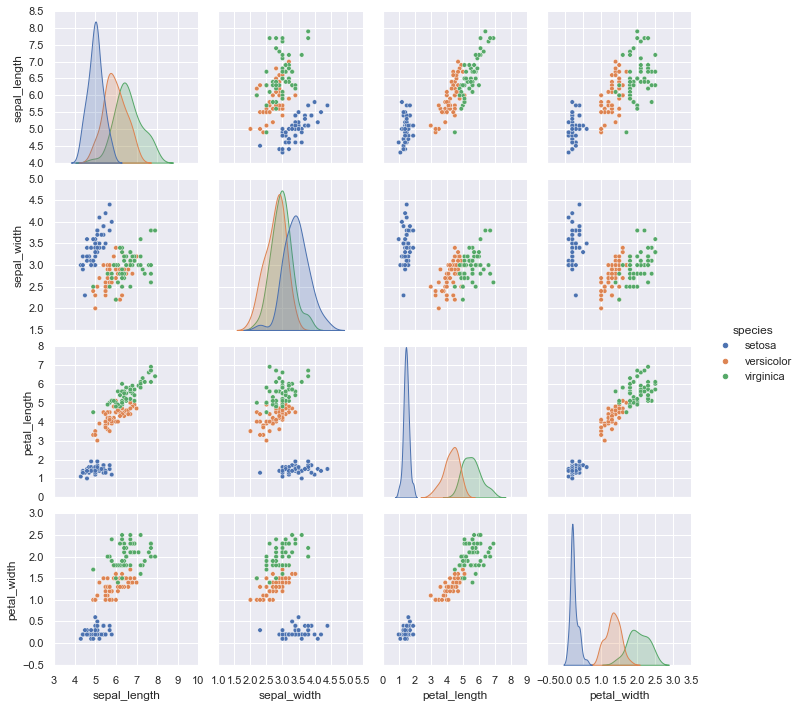

In [29]:
sns.pairplot(iris, hue='species');

In [30]:
#faceted histograms
#histogram dari bagian-bagiannya
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


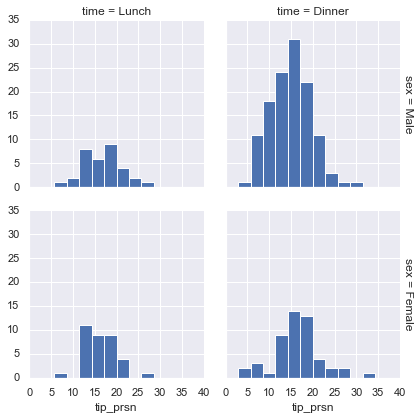

In [31]:
tips['tip_prsn'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_prsn", bins=np.linspace(0, 40, 15));

C:\Users\kl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


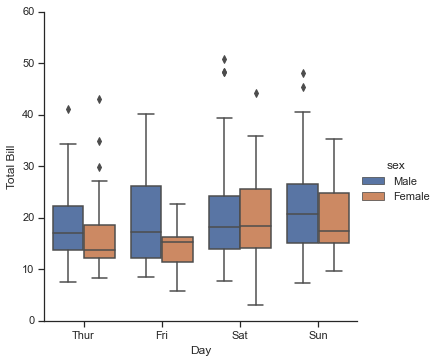

In [32]:
#categorical plots
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

C:\Users\kl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


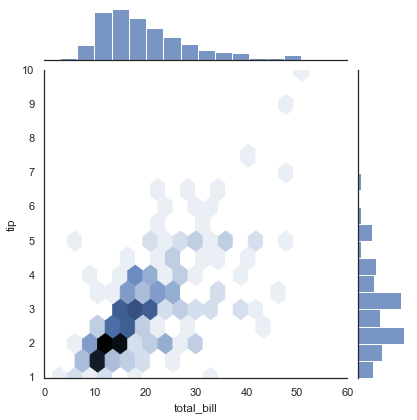

In [33]:
#joint distribution
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

In [34]:
#Joint plot juga dapat melakukan kernel density estimation dan regression secara otomatis:
sns.jointplot("total_bill", "tip", data=tips, kind='reg', stat_func=stats.pearsonr, xlim=(0,55), ylim=(0,12));

# stat_func --> deprecated
# xlim dan ylim --> ukuran grid

NameError: name 'stats' is not defined